## Conditonal Plots 
Learn how to create attractive conditional plots using Seaborn.

So far, we've mostly worked with plots that are quick to analyze and make sense of. Line charts, scatter plots, and bar plots allow us to convey a few nuggets of insights to the reader. We've also explored how we can combine those plots in interesting ways to convey deeper insights and continue to extend the storytelling power of data visualization. In this mission, we'll explore how to quickly create multiple plots that are subsetted using one or more conditions.

We'll be working with the [seaborn](http://seaborn.pydata.org/) visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. Here are some examples of some complex plots that can be created using seaborn:

<img src="./images/seaborn_gallery.png/">

Before we dive into seaborn, let's understand the data set we'll be working with in this mission.

## Introduction to the Data Set

We'll be working with a data set of the passengers of the Titanic. The [Titanic shipwreck](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic) is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

The data set was compiled by Kaggle for their introductory data science competition, called **Titanic: Machine Learning from Disaster**. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes. You can download the data set by navigating to the [data download page](https://www.kaggle.com/c/titanic/data) for the competition and creating a free account.

The data for the passengers is contained in two files:
- <code><font color="red">train.csv</font></code>: Contains data on 712 passengers
- <code><font color="red">test.csv</font></code>: Contains data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the <code><font color="red">train.csv</font></code> file, because the <code><font color="red">Survived</font></code> column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in <code><font color="red">test.csv</font></code>, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in <code><font color="red">train.csv</font></code>:

- <code><font color="red">PassengerId</font></code> -- A numerical id assigned to each passenger.
- <code><font color="red">Survived</font></code> -- Whether the passenger survived (<code><font color="red">1</font></code>), or didn't (<code><font color="red">0</font></code>).
- <code><font color="red">Pclass</font></code> -- The class the passenger was in.
- <code><font color="red">Name</font></code> -- the name of the passenger.
- <code><font color="red">Sex</font></code> -- The gender of the passenger -- male or female.
- <code><font color="red">Age</font></code> -- The age of the passenger. Fractional.
- <code><font color="red">SibSp</font></code> -- The number of siblings and spouses the passenger had on board.
- <code><font color="red">Parch</font></code> -- The number of parents and children the passenger had on board.
- <code><font color="red">Ticket</font></code> -- The ticket number of the passenger.
- <code><font color="red">Fare</font></code> -- How much the passenger paid for the ticker.
- <code><font color="red">Cabin</font></code> -- Which cabin the passenger was in.
- <code><font color="red">Embarked</font></code> -- Where the passenger boarded the Titanic.

Let's remove columns like Name and Ticket that we don't have a way to visualize. In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.

**Instructions**
- Read <code><font color="red">train.csv</font></code> into a DataFrame named <code><font color="red">titanic</font></code>. Keep only the following columns:
    - <code><font color="red">"Survived"</font></code>
    - <code><font color="red">"Pclass"</font></code>
    - <code><font color="red">"Sex"</font></code>
    - <code><font color="red">"Age"</font></code>
    - <code><font color="red">"SibSp"</font></code>
    - <code><font color="red">"Parch"</font></code>
    - <code><font color="red">"Fare"</font></code>
    - <code><font color="red">"Embarked"</font></code>
- Use the [DataFrame.dropna()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) method to remove rows containing missing values.


In [1]:
import pandas as pd
titanic = pd.read_csv("../data/train.csv")
# Drop the columns where all elements are nan
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[cols].dropna()

In [2]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


## Creating Histogram in Seaborn 
Seaborn works similarly to the <code><font color="red">pyplot</font></code> module from matplotlib. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the <code><font color="red">pyplot</font></code> module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call <code><font color="red">pyplot.show()</font></code>.

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the <code><font color="red">Fare</font></code> column using the <code><font color="red">seaborn.distplot()</font></code> function:
```python
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt
sns.distplot(titanic["Fare"])
plt.show()
```
Here's the plot that's generated when the above code is run:

<img src="./images/seaborn_histogram_with_kde.png"/>

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. If you're interested in learning about [how KDE works, you can read more on Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation).

What you need to know for now is that the resulting line is a smoother version of the histogram, called a **kernel density plot**. Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission. When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.

**Instructions**
- import <code><font color="red">seaborn</font></code> as <code><font color="red">sns</font></code> and <code><font color="red">matplotlib.pyplot</font></code> as <code><font color="red">plt</font></code>
- Use the <code><font color="red">seaborn.displot()</font></code> function to visualize the distribution of the <code><font color="red">"Age"</font></code> column
- Display the plot using <code><font color="red">plt.show()</font></code>

In [3]:
import seaborn as sns 
from matplotlib import pyplot as plt
sns.distplot(titanic["Age"])
plt.show()

/home/alvin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 640x480 with 1 Axes>

## Generating A kernel Density Plot

While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution. To generate just the kernel density plot, we use the <code><font color="red">seaborn.kdeplot()</font></code> function:
```python
sns.kdeplot(titanic["Age"])
```
Here's what just the kernel density plot looks like:
<img src="./images/seaborn_kdeplot.png"/>
While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart. When we also had the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. When calling the <code><font color="red">seaborn.kdeplot()</font></code> function, we can shade the area under the line by setting the <code><font color="red">shade</font></code> parameter to <code><font color="red">True</font></code>.

**Instructions**
- Generate a kernel density plot:
    - Using the values in the <code><font color="red">"Age"</font></code> column
    - With the area under the curve shaded
- Set the x-axis to <code><font color="red">"Age"</font></code> column using <code><font color="red">pyplot.xlabel()</font></code>


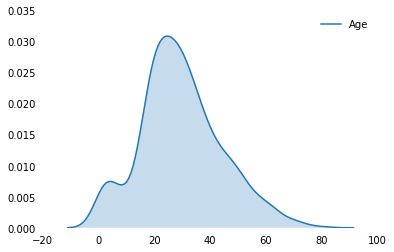

In [4]:
fig, ax = plt.subplots()
sns.kdeplot(titanic["Age"], shade=True)
for key, sp in ax.spines.items():
    sp.set_visible(False)
ax.tick_params(bottom=False, right=False, left=False, top=False)
ax.set_ylim(0, 0.035)
ax.set_xlim(-20,100)
plt.legend(frameon=False)
plt.show()

## Modifying The Appearance of The Plots

From the plots in the previous step, you'll notice that seaborn:

- Sets the x-axis label based on the column name passed through <code><font color="red">plt.xlabel()</font></code> function
- Sets the background color to a light gray color
- Hides the x-axis and y-axis ticks
- Displays the coordinate grid

In the last few missions, we explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the <code><font color="red">seaborn.set_style()</font></code> function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

- <code><font color="red">darkgrid</font></code>: Coordinate grid displayed, dark background color
- <code><font color="red">whitegrid</font></code>: Coordinate grid displayed, white background color
- <code><font color="red">dark</font></code>: Coordinate grid hidden, dark background color
- <code><font color="red">white</font></code>: Coordinate grid hidden, white background color
- <code><font color="red">ticks</font></code>: Coordinate grid hidden, white background color, ticks visible

Here's a diagram that compares the same plot across all styles:

<img src="./images/seaborn_all_styles.png"/>

By default, the seaborn style is set to <code><font color="red">"darkgrid"</font></code>:
```python
sns.set_style("darkgrid")
```
If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the <code><font color="red">seaborn.despine()</font></code> function:
```python
sns.despine()
```
By default, only the top and right axes will be **despined**, or have their spines removed. To despine the other two axes, we need to set the left and bottom parameters to <code><font color="red">True</font></code>.

**Instructions**
- Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
- Generate a kernel density plot of the <code><font color="red">"Age"</font></code> column, with the area under the curve shaded.
- Set the x-axis to <code><font color="red">"Age"</font></code> column using <code><font color="red">pyplot.xlabel()</font></code>
- Despine all of the axes.


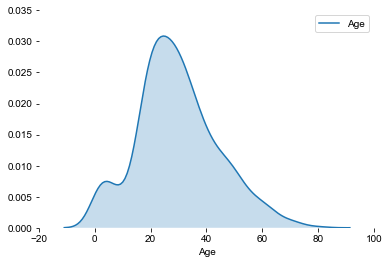

In [5]:
sns.kdeplot(titanic["Age"], shade=True)
sns.set_style("white")
sns.despine(left=True, bottom=True)
plt.xlabel("Age")
plt.xlim(-20, 100)
plt.ylim(0, 0.035)
plt.show()


## Conditional Distributions Using A Single Condition
In the last few missions, we created a small multiple, which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the <code><font color="red">"Age"</font></code> column where <code><font color="red">Survived</font></code> equalled <code><font color="red">0</font></code> and the other would visualize the distribution of values in the <code><font color="red">"Age"</font></code> column where <code><font color="red">Survived</font></code> equalled <code><font color="red">1</font></code>.

Here's what those plots look like:
<img src="./images/seaborn_simple_conditional.png"/>
The code to generate the pair of plots, is short and sweet:
```python
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
```

Seaborn handled:

- subsetting the data into rows where <code><font color="red">Survived</font></code> is <code><font color="red">0</font></code> and where <code><font color="red">Survived</font></code> is <code><font color="red">1</font></code>
- creating both Axes objects, ensuring the same axis scales
- plotting both kernel density plots

Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The <code><font color="red">seaborn.FacetGrid</font></code> object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from <code><font color="red">FacetGrid</font></code> is another word for "subset". Setting the <code><font color="red">col</font></code> parameter to  <code><font color="red">"Survived"</font></code> specifies a separate plot for each unique value in the Survived column. Setting the <code><font color="red">size</font></code> parameter to <code><font color="red">6</font></code> specifies a height of 6 inches for each plot.

Once we've created the grid, we use the <code><font color="red">FacetGrid.map()</font></code> method to specify the plot we want for each unique value of <code><font color="red">Survived</font></code>. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into <code><font color="red">FacetGrid.map()</font></code> has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

```python
g = sns.FacetGrid(titanic, col="Survived", size=6)
g.map(plt.hist, "Age")
```
Let's create a grid of plots that displays the age distributions for each class.

**Instructions**

- Use a <code><font color="red">FacetGrid</font></code> instance to generate three plots on the same row:
    - One for each unique value of <code><font color="red">Pclass</font></code>.
    - Each plot should be a kernel density plot of the <code><font color="red">"Age"</font></code> column, with the area under the curve shaded.
    - Each plot should have a height of <code><font color="red">6</font></code> inches.
- Remove all of the spines using <code><font color="red">seaborn.despine()</font></code>.
- Display the plots.



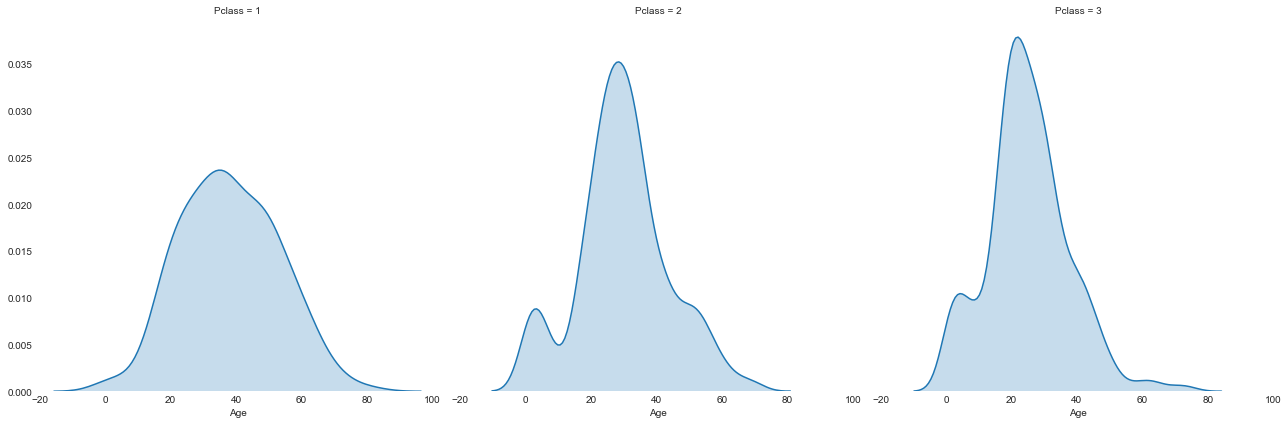

In [6]:
g = sns.FacetGrid(titanic, col="Pclass", size=6)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(bottom=True, left=True)
plt.show()

## Creating Conditional Plots Using Two Conditons
We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a <code><font color="red">FacetGrid</font></code>, we use the <code><font color="red">row</font></code> parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

The starter code subsets the dataframe on different combinations of unique values in both the <code><font color="red">Pclass</font></code> and <code><font color="red">Survived</font></code> columns. Try changing the conditions to see the resulting plots.

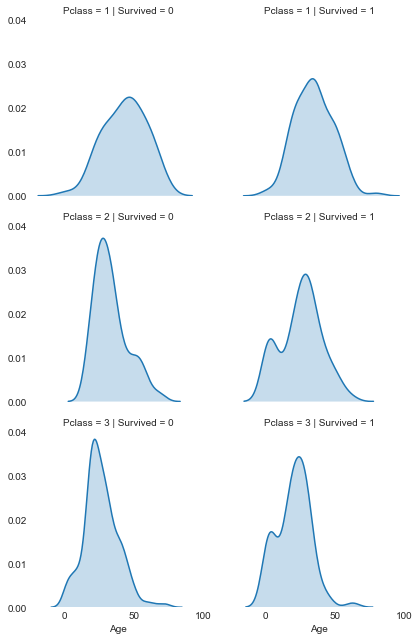

In [7]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

## Creating Conditional Plots using Three Conditions
When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the <code><font color="red">hue</font></code> parameter to the column name from the dataframe.

Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.

**Instructions**
- Use a <code><font color="red">FacetGrid</font></code> instance to generate a grid of plots using the following conditions:
    - The <code><font color="red">Survived</font></code> column across the columns in the grid.
    - The <code><font color="red">Pclass</font></code> column across the rows in the grid.
    - The <code><font color="red">Sex</font></code> column using different hues.
- Each plot should be a kernel density plot of the <code><font color="red">"Age"</font></code> column, with the area under the curve shaded.
- Each plot should have a height of <code><font color="red">3</font></code> inches.
- Remove all of the spines using <code><font color="red">seaborn.despine()</font></code>.
- Display the plots.


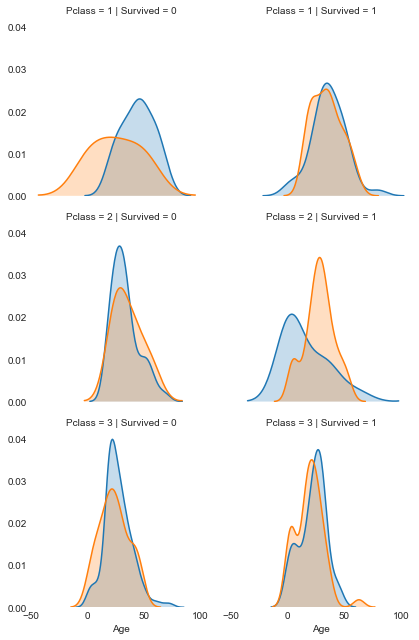

In [8]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(bottom=True, left=True)
plt.show()

## Adding A Legend

Now that we're coloring plots, we need a legend to keep track of which value each color represents. As a challenge to you, we won't specify how exactly to generate a legend in seaborn. Instead, we encourage you to use the [examples](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) from the page on plotting using the FacetGrid instance.

Here's what we want the final grid to look like:
<img src="./images/seaborn_three_conditions.png/">

**Instructions**
- Use a <code><font color="red">FacetGrid</font></code> instance to generate a grid of plots using the following conditions:
    - The <code><font color="red">Survived</font></code> column across the columns in the grid.
    - The <code><font color="red">Pclass</font></code> column across the rows in the grid.
    - The <code><font color="red">Sex</font></code> column using different hues.
- Each plot should be a kernel density plot of the <code><font color="red">"Age"</font></code> column, with the area under the curve shaded.
- Each plot should have a height of <code><font color="red">3</font></code> inches.
- Remove all of the spines using <code><font color="red">seaborn.despine()</font></code>.
- Add a legend for the <code><font color="red">"Sex"</font></code> column
- Display the plots.

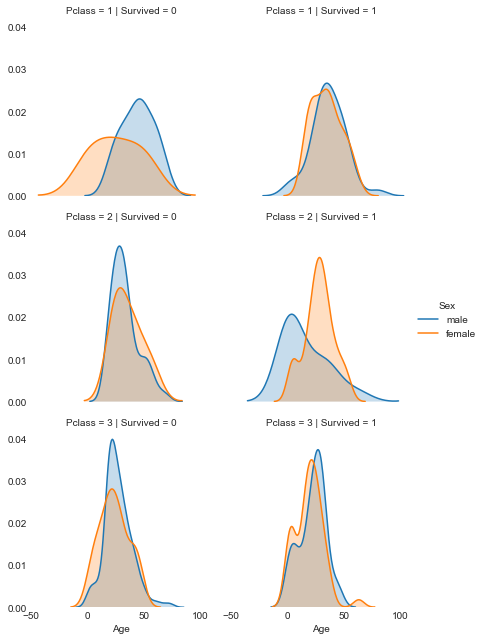

In [9]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(bottom=True, left=True)
plt.show()

## Next steps
In this mission, we learned how the seaborn library lets us quickly style plots and create small multiples using conditions we specify. In the next mission, we'll explore how to visualize geographic data using matplotlib.

**Previous**: Section 3 - Guided project: Visualizing the gender gap in college degrees \[[github](https://github.com/alvinctk/DataQuest/blob/master/Storytelling_Through_Data_Visualization/03_Guided_Project_Visualizing_The_Gender_Gap_In_College_Degrees/Project_Visualizing_The_Gender_Gap_In_College_Degrees.ipynb)\] \[[nbviewer](https://nbviewer.jupyter.org/github/alvinctk/DataQuest/blob/master/Storytelling_Through_Data_Visualization/03_Guided_Project_Visualizing_The_Gender_Gap_In_College_Degrees/Project_Visualizing_The_Gender_Gap_In_College_Degrees.ipynb)\]

**Next**: Section 5 - Visualizing geographic data \[[github](https://github.com/alvinctk/DataQuest/blob/master/Storytelling_Through_Data_Visualization/05_Visualizing_Geographic_Data/Visualizing_Geographic_Data.ipynb)\] \[[nbviewer](https://nbviewer.jupyter.org/github/alvinctk/DataQuest/blob/master/Storytelling_Through_Data_Visualization/05_Visualizing_Geographic_Data/Visualizing_Geographic_Data.ipynb)\]

**Other sections:**
- Section 1 - Improving plot aesthetics \[[github](https://github.com/alvinctk/DataQuest/blob/master/Storytelling_Through_Data_Visualization/01_Improving_Plot_Aesthetics/Improving_Plot_Aesthetics.ipynb)\] \[[nbviewer](https://nbviewer.jupyter.org/github/alvinctk/DataQuest/blob/master/Storytelling_Through_Data_Visualization/01_Improving_Plot_Aesthetics/Improving_Plot_Aesthetics.ipynb)\]

- Section 2 - Color layouts and annotations \[[github](https://github.com/alvinctk/DataQuest/blob/master/Storytelling_Through_Data_Visualization/02_Color_Layout_And_Annotations/Color_Layout_And_Annotations.ipynb)\] \[[nbviewer](https://nbviewer.jupyter.org/github/alvinctk/DataQuest/blob/master/Storytelling_Through_Data_Visualization/02_Color_Layout_And_Annotations/Color_Layout_And_Annotations.ipynb)\]


